In [27]:
import json
from pprint import pprint

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from PIL import Image, ImageDraw

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import data

{'id': 2416,
 'image': {'coco_url': 'http://mscoco.org/images/534127',
           'file_name': 'COCO_val2014_000000534127.jpg',
           'flickr_url': 'http://farm4.staticflickr.com/3187/2716894784_982b56503f_z.jpg',
           'height': 360,
           'id': 534127,
           'width': 640},
 'object_id': 2159052,
 'objects': [{'area': 2487.0305500000004,
              'bbox': [21.08, 145.54, 47.84, 94.05],
              'category': 'person',
              'category_id': 1,
              'id': 480437,
              'segment': [[39.73,
                           229.86,
                           43.78,
                           222.57,
                           38.11,
                           211.22,
                           34.86,
                           213.65,
                           27.57,
                           209.59,
                           25.14,
                           196.62,
                           21.08,
                           177.97,
       

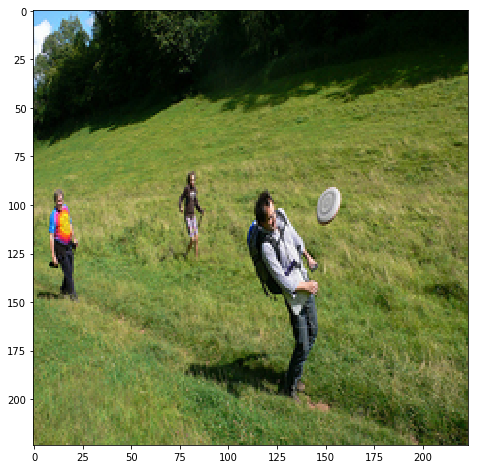

In [42]:
with open(data.get_gw_file('train'), 'r') as f:
    i = 0
    
    for line in f:
        i += 1
        if i == 2:
            break
        
        # schema: https://guesswhat.ai/download
        example = json.loads(line)
        pprint(example)
        
        img_path = data.get_coco_file(example['image']['file_name'])
        # print(img_path)
        
        img = Image.open(img_path)
        
        img_resized = img.resize((224, 224), Image.ANTIALIAS)
        plt.imshow(img_resized)
        
        # print(np.array(img_resized).shape)

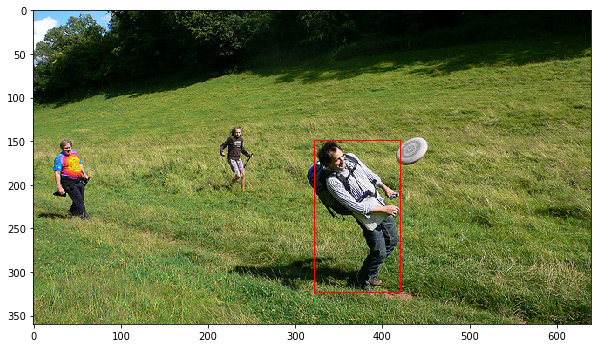

In [43]:
numObjects = len(example['objects'])
objectGet = int(np.random.randn()*numObjects)
x, y, width, height = example['objects'][objectGet]['bbox']
area = map(int, [x, y, x + width, y + height])
img_crop = img.crop(area)
#plt.imshow(img_crop)
#plt.imshow(img)
draw = ImageDraw.Draw(img)
draw.rectangle([x,y,x+width,y+height],fill=None,outline="#ff0000")
plt.imshow(img)

In [4]:
category_ids = set()

with open(data.get_gw_file('train'), 'r') as f:
    i = 0
    
    for line in f:
        i += 1
        
        # schema: https://guesswhat.ai/download
        example = json.loads(line)
        
        category_ids.update(o['category_id'] for o in example['objects'])
        
print(category_ids)
print(len(category_ids))
print(max(category_ids))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90}
80
90


In [5]:
import pickle

with open(data.get_processed_file('oracle', 'train', small=True), 'rb') as f:
    tokens, question_lengths, features, categories, answers = pickle.load(f)
    
print(tokens.max())
print(tokens.min())

2697
0
